In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import random
import glob

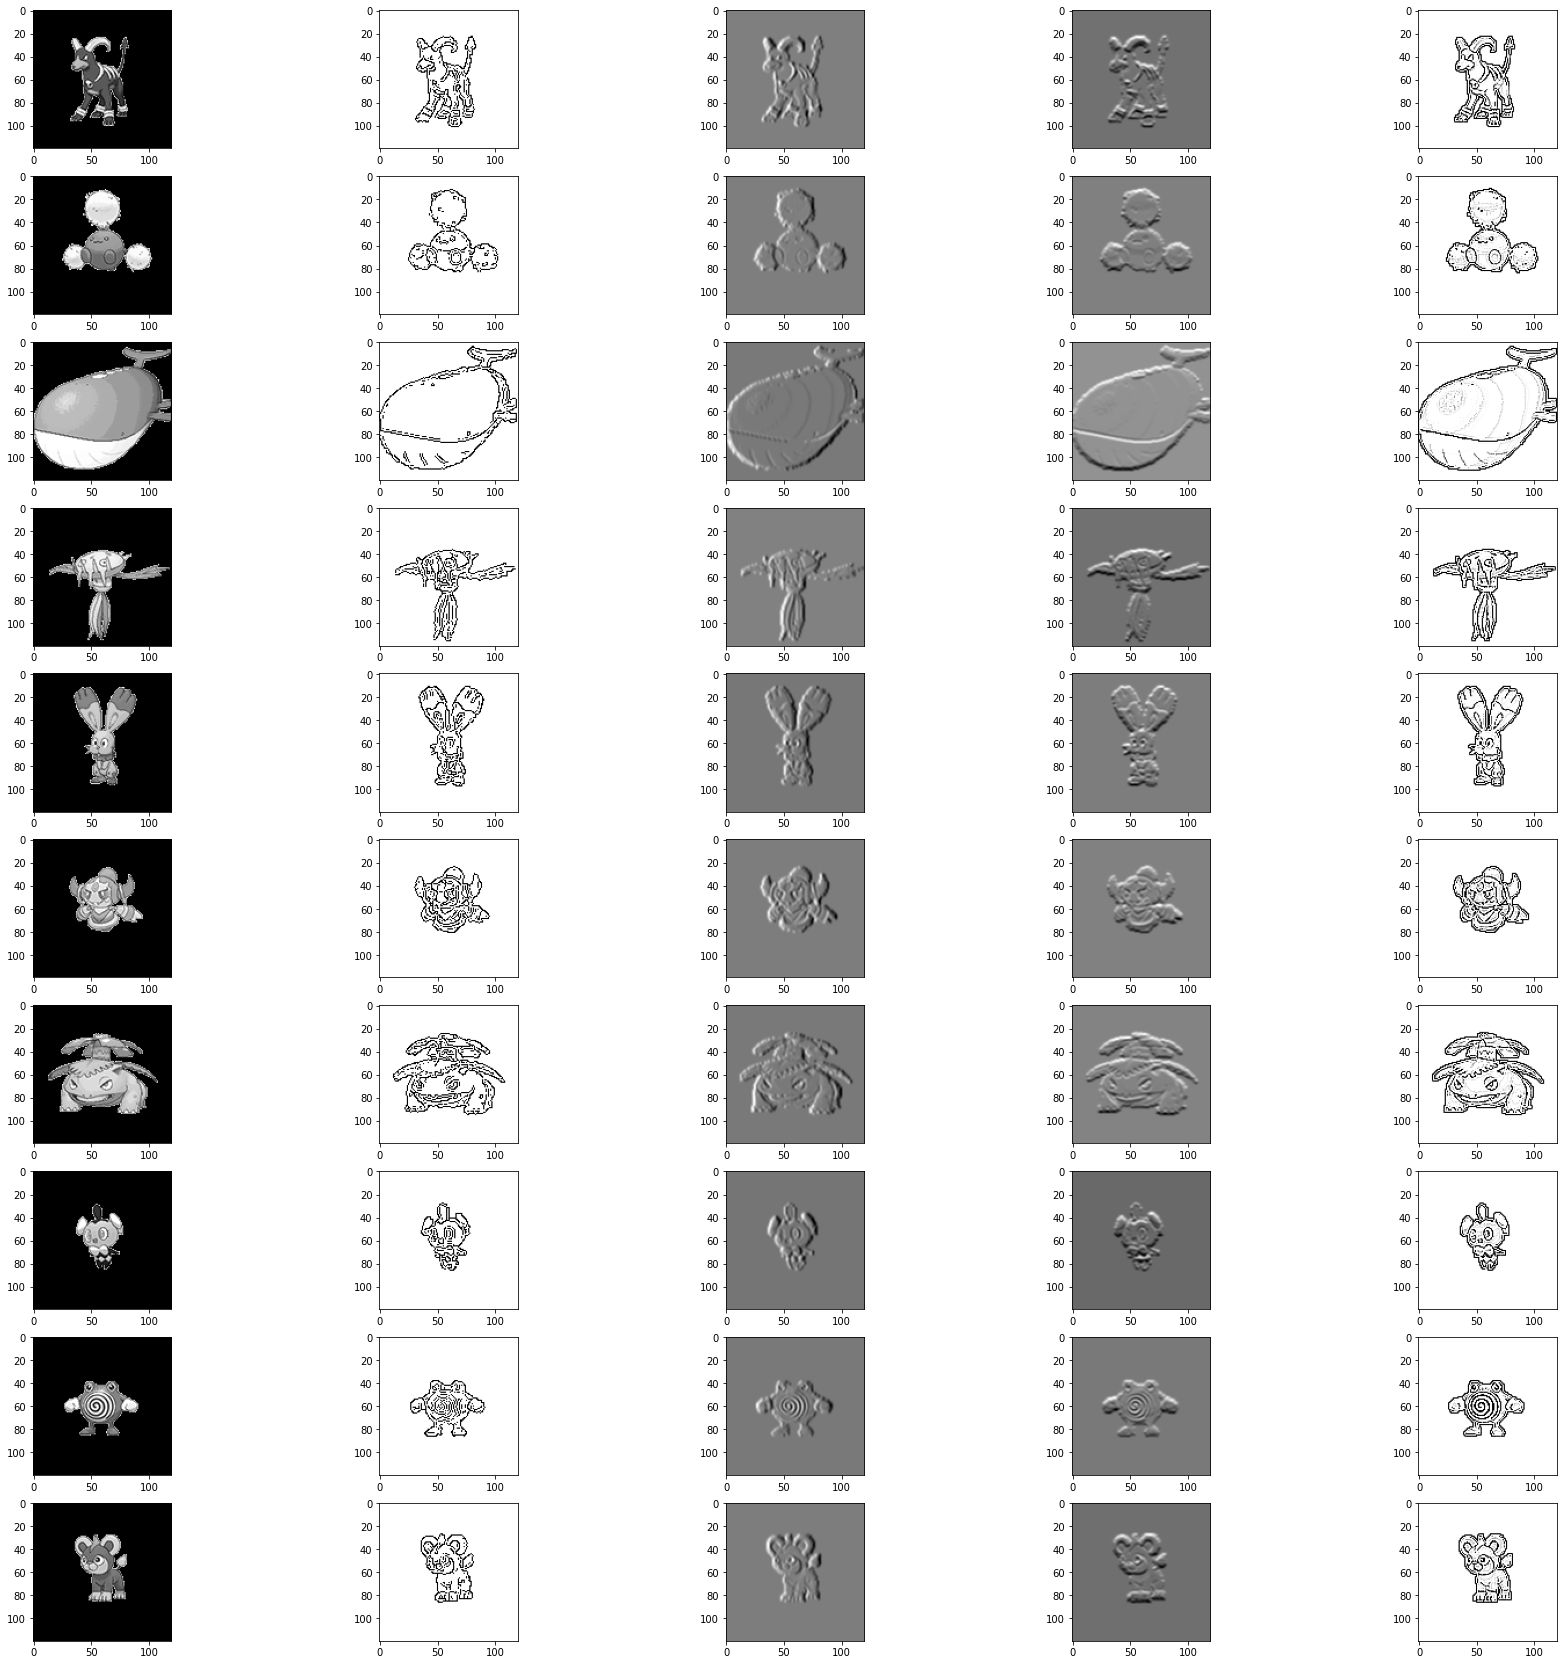

In [29]:
img_dict = {}

def invert(img):
    return 255-img

kernel = np.array([
    [1,1,1],
    [1,-8,1],
    [1,1,1]
])

NB_IMAGES = 10
IMAGES_DIR = "../data/images/images/*"

for filename in random.choices(glob.glob(IMAGES_DIR), k=NB_IMAGES):
    if filename not in img_dict.keys():
        img_dict[filename] = {}
    img_dict[filename]["origin"] = cv2.imread(filename,0)
    img_dict[filename]["canny"] = invert(cv2.Canny(img_dict[filename]["origin"],100,150)) 
    img_dict[filename]["sobelx"] = cv2.Sobel(img_dict[filename]["origin"],cv2.CV_64F,1,0,ksize=5)
    img_dict[filename]["sobely"] = cv2.Sobel(img_dict[filename]["origin"],cv2.CV_64F,0,1,ksize=5)
    img_dict[filename]["laplacian"] = invert(cv2.filter2D(img_dict[filename]["origin"], -1, kernel))

fig, ax = plt.subplots(len(img_dict.keys()), len(img_dict[list(img_dict.keys())[0]]), figsize = (30,30))
for i,filename in enumerate(list(img_dict.keys())):
    ax[i,0].imshow(img_dict[filename]["origin"], cmap="gray")
    ax[i,1].imshow(img_dict[filename]["canny"], cmap = "gray")
    ax[i,2].imshow(img_dict[filename]["sobelx"], cmap="gray")
    ax[i,3].imshow(img_dict[filename]["sobely"], cmap="gray")
    ax[i,4].imshow(img_dict[filename]["laplacian"], cmap="gray")